### **Cohort analysis (Retention over User & Product lifetime)**
![alt text](cohort.png "Title")

##### A cohort is a group of subjects who share a defining characteristic. We can observe how a cohort behaves across time and compare it to other cohorts. Cohorts are used in medicine, psychology, econometrics, ecology and many other areas to perform a cross-section (compare difference across subjects) at intervals through time.

##### Types of cohorts:

- Time Cohorts are customers who signed up for a product or service during a particular time frame. Analyzing these cohorts shows the customers’ behavior depending on the time they started using the company’s products or services. The time may be monthly or quarterly even daily.
- Behavior cohorts are customers who purchased a product or subscribed to a service in the past. It groups customers by the type of product or service they signed up. Customers who signed up for basic level services might have different needs than those who signed up for advanced services. Understaning the needs of the various cohorts can help a company design custom-made services or products for particular segments.
- Size cohorts refer to the various sizes of customers who purchase company’s products or services. This categorization can be based on the amount of spending in some periodic time after acquisition or the product type that the customer spent most of their order amount in some period of time.

##### **Import libraries and dataset**

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mnso

In [2]:
df = pd.read_csv('online_retail_II.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Check missing data

<AxesSubplot:>

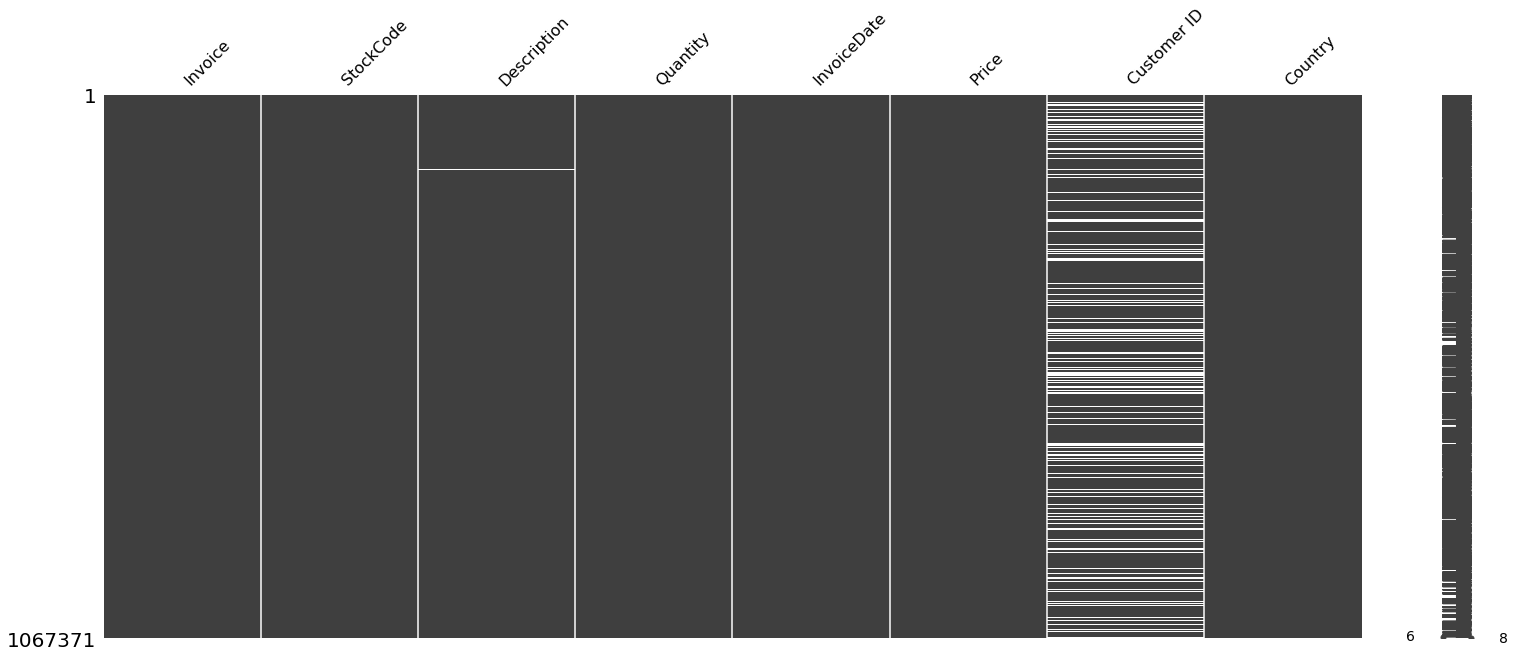

In [4]:
mnso.matrix(df)

There are missing data in Description and Customer ID columns.

In [5]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [6]:
df = df.dropna(subset=['Customer ID'])

In [7]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

Check duplicates data

In [8]:
df.duplicated().sum()

26479

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797885 non-null  object 
 1   StockCode    797885 non-null  object 
 2   Description  797885 non-null  object 
 3   Quantity     797885 non-null  int64  
 4   InvoiceDate  797885 non-null  object 
 5   Price        797885 non-null  float64
 6   Customer ID  797885 non-null  float64
 7   Country      797885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 54.8+ MB


In [12]:
df.describe()

,Quantity,Price,Customer ID
count,797885.000000,797885.000000,797885.000000
mean,12.602980,3.702732,15313.062777
std,191.670371,71.392549,1696.466663
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13964.000000
50%,5.000000,1.950000,15228.000000
75%,12.000000,3.750000,16788.000000
max,80995.000000,38970.000000,18287.000000


Let's have a look at the above table, we can see that the minimum unit of Quantity is negative and the minimum price is 0.

In [13]:
df=df[(df['Quantity']>0) & (df['Price']>0)]
df.describe() 

,Quantity,Price,Customer ID
count,779425.000000,779425.000000,779425.000000
mean,13.489370,3.218488,15320.360461
std,145.855814,29.676140,1695.692775
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13971.000000
50%,6.000000,1.950000,15247.000000
75%,12.000000,3.750000,16794.000000
max,80995.000000,10953.500000,18287.000000


In [14]:
df.shape

(779425, 8)

#### **Cohort analysis**
For cohort analysis, there are a few labels that we have to create:

- Invoice period: A string representation of the year and month of a single transaction/invoice.
- Cohort group: A string representation of the the year and month of a customer’s first purchase. This label is common across all invoices for a particular customer.
- Cohort period / Cohort Index: A integer representation a customer’s stage in its “lifetime”. The number represents the number of months passed since the first purchase.

In [15]:
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')
df['InvoiceMonth'] = df['InvoiceDate'].apply(lambda x: dt.datetime(x.year,x.month,1))
grp = df.groupby('Customer ID')['InvoiceMonth']
df['CohortMonth'] = grp.transform('min')
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth,CohortMonth
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France,2011-12-01,2011-08-01


In [16]:
def get_month_int (dframe,column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month , day 

invoice_year,invoice_month,_ = get_month_int(df,'InvoiceMonth')
cohort_year,cohort_month,_ = get_month_int(df,'CohortMonth')

year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

df['CohortIndex'] = year_diff * 12 + month_diff + 1 

In [17]:
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Customer ID'].apply(pd.Series.nunique).reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Customer ID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2009-12-01,955.0,337.0,319.0,406.0,363.0,343.0,360.0,327.0,321.0,346.0,...,289.0,251.0,289.0,270.0,248.0,244.0,301.0,291.0,389.0,188.0
2010-01-01,383.0,79.0,119.0,117.0,101.0,115.0,99.0,88.0,107.0,122.0,...,58.0,90.0,76.0,71.0,75.0,93.0,74.0,94.0,22.0,NaN
2010-02-01,374.0,89.0,84.0,109.0,92.0,75.0,72.0,107.0,95.0,103.0,...,75.0,60.0,61.0,54.0,86.0,86.0,61.0,22.0,NaN,NaN
2010-03-01,443.0,84.0,102.0,107.0,103.0,90.0,109.0,134.0,122.0,48.0,...,75.0,77.0,69.0,78.0,89.0,94.0,35.0,NaN,NaN,NaN
2010-04-01,294.0,57.0,57.0,48.0,54.0,66.0,81.0,77.0,31.0,32.0,...,46.0,41.0,44.0,53.0,66.0,17.0,NaN,NaN,NaN,NaN
2010-05-01,254.0,40.0,43.0,44.0,45.0,65.0,54.0,32.0,15.0,21.0,...,32.0,35.0,42.0,39.0,12.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,270.0,47.0,51.0,55.0,62.0,77.0,34.0,24.0,22.0,32.0,...,33.0,36.0,55.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,186.0,29.0,34.0,55.0,54.0,26.0,21.0,27.0,27.0,21.0,...,32.0,44.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,162.0,33.0,48.0,52.0,28.0,19.0,16.0,20.0,22.0,21.0,...,32.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### **Retention table**

In [18]:
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) 
retention.round(3) * 100 

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2009-12-01,100.0,35.3,33.4,42.5,38.0,35.9,37.7,34.2,33.6,36.2,...,30.3,26.3,30.3,28.3,26.0,25.5,31.5,30.5,40.7,19.7
2010-01-01,100.0,20.6,31.1,30.5,26.4,30.0,25.8,23.0,27.9,31.9,...,15.1,23.5,19.8,18.5,19.6,24.3,19.3,24.5,5.7,NaN
2010-02-01,100.0,23.8,22.5,29.1,24.6,20.1,19.3,28.6,25.4,27.5,...,20.1,16.0,16.3,14.4,23.0,23.0,16.3,5.9,NaN,NaN
2010-03-01,100.0,19.0,23.0,24.2,23.3,20.3,24.6,30.2,27.5,10.8,...,16.9,17.4,15.6,17.6,20.1,21.2,7.9,NaN,NaN,NaN
2010-04-01,100.0,19.4,19.4,16.3,18.4,22.4,27.6,26.2,10.5,10.9,...,15.6,13.9,15.0,18.0,22.4,5.8,NaN,NaN,NaN,NaN
2010-05-01,100.0,15.7,16.9,17.3,17.7,25.6,21.3,12.6,5.9,8.3,...,12.6,13.8,16.5,15.4,4.7,NaN,NaN,NaN,NaN,NaN
2010-06-01,100.0,17.4,18.9,20.4,23.0,28.5,12.6,8.9,8.1,11.9,...,12.2,13.3,20.4,5.2,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,100.0,15.6,18.3,29.6,29.0,14.0,11.3,14.5,14.5,11.3,...,17.2,23.7,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,100.0,20.4,29.6,32.1,17.3,11.7,9.9,12.3,13.6,13.0,...,19.8,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


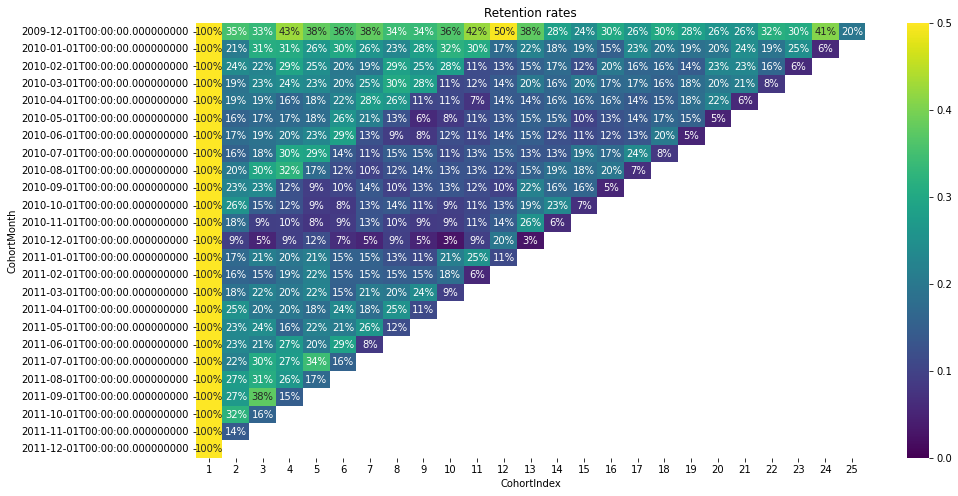

In [19]:
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="viridis")
plt.show()

Customer retention is a very useful metric to figure out how many of all the customers are still active. Retention rate gives you the percentage of active customers compared to the total number of customers.

##### **Average quantity for each cohort**


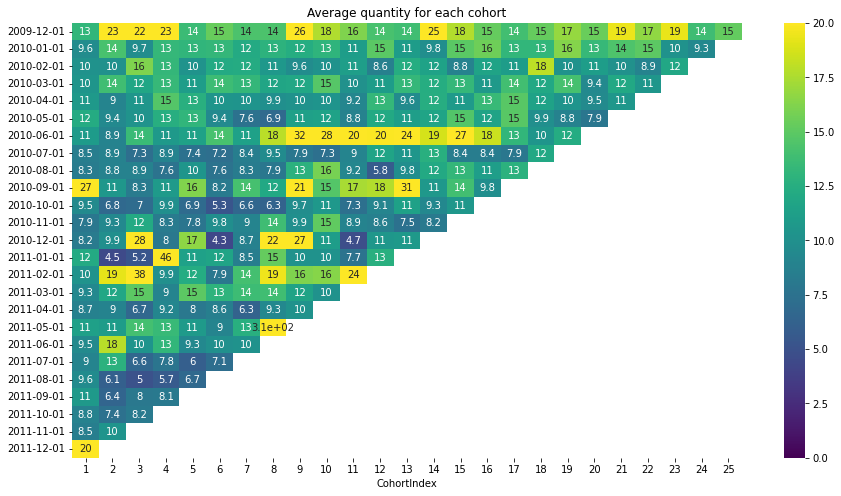

In [20]:
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')
average_quantity.round(1)
average_quantity.index = average_quantity.index.date

plt.figure(figsize=(15, 8))
plt.title('Average quantity for each cohort')
sns.heatmap(data=average_quantity,annot = True,vmin = 0.0,vmax =20,cmap="viridis")
plt.show()

### **RFM calculation**
![alt text](rfm.png "Title")

### What is RFM?

RFM is an acronym of recency, frequency and monetary. 

- Recency is about when was the last order of a customer. It means the number of days since a customer made the last purchase. If it’s a case for a website or an app, this could be interpreted as the last visit day or the last login time.

- Frequency is about the number of purchase in a given period. It could be 3 months, 6 months or 1 year. So we can understand this value as for how often or how many a customer used the product of a company. The bigger the value is, the more engaged the customers are. Could we say them as our VIP? Not necessary. Cause we also have to think about how much they actually paid for each purchase, which means monetary value.

- Monetary is the total amount of money a customer spent in that given period. Therefore big spenders will be differentiated with other customers such as MVP or VIP.

Process of calculating percentiles:

1. Sort customers based on that metric
2. Break customers into a pre-defined number of groups of equal size
3. Assign a label to each group

In [23]:
df['TotalSum'] = df['Price']* df['Quantity']

print('Min Invoice Date:',df.InvoiceDate.dt.date.min(),'\nMax Invoice Date:',df.InvoiceDate.dt.date.max())

Min Invoice Date: 2009-12-01 
Max Invoice Date: 2011-12-09


In the real world, we would be working with the most recent snapshot of the data of today or yesterday

In [24]:
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

Calculating RFM metrics

In [27]:
rfm = df.groupby(['Customer ID']).agg({'InvoiceDate': lambda x : (snapshot_date - x.max()).days,
                                      'Invoice':'count','TotalSum': 'sum'})

rfm.rename(columns={'InvoiceDate':'Recency','Invoice':'Frequency','TotalSum':'Monetary'}
           ,inplace= True)

rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,326,34,77556.46
12347.0,2,222,4921.53
12348.0,75,51,2019.40
12349.0,19,175,4428.69
12350.0,310,17,334.40


### **Build RFM segments**
We will rate "Recency" customer who have been active more recently better than the less recent customer,because each company wants its customers to be recent

We will rate "Frequency" and "Monetary" higher label because we want Customer to spend more money and visit more often(that is different order than recency).

In [29]:
r_labels =range(4,0,-1)
f_labels=range(1,5)
m_labels=range(1,5)
r_quartiles = pd.qcut(rfm['Recency'], q=4, labels = r_labels)
f_quartiles = pd.qcut(rfm['Frequency'],q=4, labels = f_labels)
m_quartiles = pd.qcut(rfm['Monetary'],q=4,labels = m_labels)
rfm = rfm.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)

In [33]:
def add_rfm(x) : return (str(x['R']) + str(x['F']) + str(x['M']))
rfm['RFM_Segment'] = rfm.apply(add_rfm,axis=1 )
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
Customer ID,,,,,,,,
12346.0,326,34,77556.46,2,2,4,224,8
12347.0,2,222,4921.53,4,4,4,444,12
12348.0,75,51,2019.40,3,2,3,323,8
12349.0,19,175,4428.69,4,4,4,444,12
12350.0,310,17,334.40,2,1,1,211,4


### **Analyzing RFM segments**

Largest RFM segments It is always the best practice to investigate the size of the segments before you use them for targeting or other business Application.

In [34]:
rfm.groupby(['RFM_Segment']).size().sort_values(ascending=False)[:5]

RFM_Segment
444    627
111    546
344    333
211    286
122    250
dtype: int64

Summary metrics per RFM Score

In [36]:
rfm.groupby('RFM_Score').agg({'Recency': 'mean','Frequency': 'mean',
                             'Monetary': ['mean', 'count'] }).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3           546.2       9.4    172.4   546
4           380.9      17.1    247.0   557
5           316.2      24.5    425.5   626
6           232.7      34.3    687.2   622
7           193.6      50.7   1096.3   625
8           147.5      72.6   1454.8   620
9            96.6     109.1   2306.0   558
10           67.7     167.9   3159.6   559
11           36.5     268.7   4934.8   538
12           10.4     561.5  14600.1   627

Use RFM score to group customers. The below table is an example of grouping customers.

| Customer Segment | Activity | Actionable Tip |
| --- | --- | --- |
| Champions | Bought recently, buy often and spend the most! | Reward them. Can be early adopters for new products. Will promote your brand. |
| Loyal Customers | Spend good money with us often. Responsive to promotions. | Upsell higher value products. Ask for reviews. Engage them. |
| Potential Loyalist | Recent customers, but spent a good amount and bought more than once. | Offer membership / loyalty program, recommend other products. |
| Recent Customers | Bought most recently, but not often. | Provide on-boarding support, give them early success, start building relationship. |
| Promising | Recent shoppers, but haven’t spent much. | Create brand awareness, offer free trials. |
| Customers Needing Attention | Above average recency, frequency and monetary values. May not have bought very recently though. | Make limited time offers, Recommend based on past purchases. Reactivate them. |
| About To Sleep | Below average recency, frequency and monetary values. Will lose them if not reactivated.	| Share valuable resources, recommend popular products / renewals at discount, reconnect with them. |
| At Risk | Spent big money and purchased often. But long time ago. Need to bring them back! | Send personalized emails to reconnect, offer renewals, provide helpful resources. |
| Can’t Lose Them | Made biggest purchases, and often. But haven’t returned for a long time. | Win them back via renewals or newer products, don’t lose them to competition, talk to them. |
| Hibernating | Last purchase was long back, low spenders and low number of orders. | Offer other relevant products and special discounts. Recreate brand value. |
| Lost | Lowest recency, frequency and monetary scores.	| Revive interest with reach out campaign, ignore otherwise. |

In this case I would group customers into 5 segments: Bronze, Silver, Gold, Platinum and Diamond.

In [37]:
def segments(df):
    if df['RFM_Score'] > 10 :
        return 'Diamond'
    elif (df['RFM_Score'] > 8) and (df['RFM_Score'] <= 10 ):
        return 'Platinum'
    elif (df['RFM_Score'] > 6) and (df['RFM_Score'] <= 8 ):
        return 'Gold'
    elif (df['RFM_Score'] > 4) and (df['RFM_Score'] <= 6 ):
        return 'Silver'
    else:  
        return 'Bronze'

rfm['General_Segment'] = rfm.apply(segments,axis=1)

rfm.groupby('General_Segment').agg({'Recency':'mean','Frequency':'mean',
                                    'Monetary':['mean','count']}).round(1)

Recency Frequency Monetary      
                   mean      mean     mean count
General_Segment                                 
Bronze            462.7      13.3    210.1  1103
Diamond            22.4     426.3  10136.6  1165
Gold              170.6      61.6   1274.8  1245
Platinum           82.1     138.6   2733.2  1117
Silver            274.6      29.4    555.9  1248